In [47]:
# This script does does analysis on the data
# This script requires access to the results.csv

In [48]:
# imports 
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [49]:
# reading in data 
results_df = pd.read_csv('results.csv')

In [ ]:
# making data frames of the three time periods we tested on 
zero_six_df = results_df[results_df['year'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006])]
seven_twelve_df = results_df[results_df['year'].isin([2007, 2008, 2009,2010, 2011, 2012])]
thirteen_eighteen_df = results_df[results_df['year'].isin([2013, 2014, 2015, 2016, 2017, 2018])]

seven_twelve_df.head()

,overall,reviewTime,reviewerID,asin,style,reviewText,year,sentimentScore,classPrediction
482,positive,"12 28, 2007",A1NV2F2U3EAK25,B000050ZRE,{'Color:': ' 0.5827000106'},"As with all Sonnet products I've used, this on...",2007,0.50000,positive
483,positive,"12 27, 2007",A2A8C5BMXMSEV3,B000050ZRE,{'Color:': ' 0.7571453046'},Bought 3 wireless routers/APs. This one works...,2007,0.88565,positive
484,positive,"12 19, 2007",A37VWMG8U0OP41,B000050ZRE,{'Color:': ' 0.0986190179'},Having tried a number of different wireless ne...,2007,0.98780,positive
485,positive,"11 21, 2007",A2E6P8E66HNRRC,B000050ZRE,{'Color:': ' 0.3587920825'},"Easy to install on XP machine, drivers worked ...",2007,0.95950,positive
486,positive,"10 25, 2007",A1K0XNQWQFQ3LX,B000050ZRE,{'Color:': ' 0.7363169911'},This was exactly what I needed. The Company p...,2007,0.86320,positive


In [ ]:
# finding the means of the sentiment scores for each time period
zero_six_mean = zero_six_df['sentimentScore'].mean()
seven_twelve_mean = seven_twelve_df['sentimentScore'].mean()
thirteen_eighteen_mean = thirteen_eighteen_df['sentimentScore'].mean()

# printing the means
print(zero_six_mean, seven_twelve_mean, thirteen_eighteen_mean)

0.825873132780083 0.819225028912876 0.757594926419061


In [52]:
# making a confusion matrix to see model accuracy
y_true = results_df['overall']
y_pred = results_df['classPrediction']
conf_matrix = confusion_matrix(y_true, y_pred)

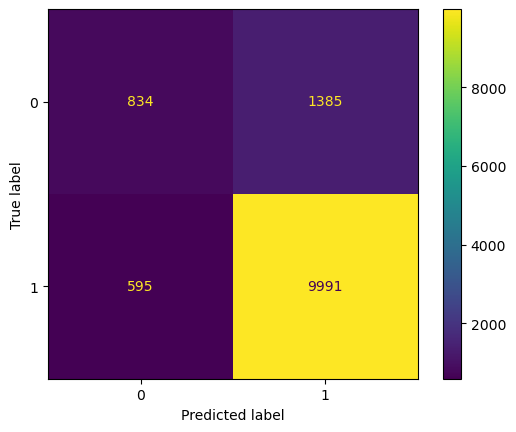

In [ ]:
# displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [54]:
# finding recall and precision scores
precision = precision_score(y_true, y_pred, average = 'binary', pos_label= 'positive')
recall = recall_score(y_true, y_pred, average = 'binary', pos_label= 'positive')
print(precision, recall)

0.8782524613220816 0.9437936897789533
